In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv'

In [ ]:
df=pd.read_csv(file_path,encoding = "ISO-8859-1")

<ipython-input-5-db886eb77a62>:1: DtypeWarning: Columns (4,31,33,61,62,76,79,90,92,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path,encoding = "ISO-8859-1")


In [ ]:
df.head().iloc[:,100:]

,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.shape

(50609, 135)

In [ ]:
null_sum=(df.isnull().sum()/len(df))*100
percent_null=null_sum.sort_values(ascending=False)
type(percent_null)
high_null_column=percent_null[percent_null>=50]
less_than_50_null_column=percent_null[~percent_null.isin(high_null_column)]
print(f'Number of column where null value less than fifty percent {len(less_than_50_null_column)}')
less_null_column=less_than_50_null_column.index.to_list()
print(less_null_column)

Number of column where null value less than fifty percent 49
['nwound', 'weapsubtype1_txt', 'weapsubtype1', 'nkill', 'weapdetail', 'latitude', 'longitude', 'targsubtype1_txt', 'targsubtype1', 'target1', 'ransom', 'natlty1_txt', 'natlty1', 'provstate', 'ishostkid', 'INT_ANY', 'property', 'INT_MISC', 'INT_IDEO', 'INT_LOG', 'dbsource', 'suicide', 'country_txt', 'iyear', 'region_txt', 'region', 'imonth', 'country', 'extended', 'iday', 'guncertain1', 'city', 'gname', 'success', 'specificity', 'targtype1_txt', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'weaptype1', 'targtype1', 'weaptype1_txt', 'individual', 'attacktype1_txt', 'attacktype1', 'multiple', 'eventid']


In [ ]:
new_df=df[less_null_column]

In [ ]:
check=new_df.columns.to_list()

In [ ]:
selected_columns_1=['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 'success', 'suicide',
 'attacktype1_txt', 'targtype1_txt',  'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus', 'claimed', 'individual', 'INT_LOG', 'doubtterr', 'INT_MISC', 'specificity','gname', 'ishostkid', 'INT_ANY', 'guncertain1', 'provstate']

In [ ]:
len(check)-len(selected_columns_1)

19

In [ ]:
print(list((set(check)) - (set(selected_columns_1))))

['crit1', 'longitude', 'property', 'weaptype1', 'attacktype1', 'extended', 'vicinity', 'natlty1', 'dbsource', 'country', 'region', 'ransom', 'targtype1', 'crit2', 'targsubtype1', 'INT_IDEO', 'nwound', 'weapsubtype1_txt', 'weapdetail', 'crit3', 'latitude', 'weapsubtype1']


In [ ]:
df_1=df[selected_columns_1]

In [ ]:
df_1.T

,0,1,2,3,4,5,6,7,8,9,...,50599,50600,50601,50602,50603,50604,50605,50606,50607,50608
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001,...,199203170029,199203170030,199203170031,199203170032,199203170033,199203170034,199203170035,199203170036,199203170037,199203170038
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992
imonth,7,0,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
iday,2,0,0,0,0,1,2,2,2,3,...,17,17,17,17,17,17,17,17,17,17
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,Turkey,Turkey,Turkey,Turkey,Turkey,Turkey,Algeria,Bangladesh,Chile,Colombia
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Middle East & North Africa,Middle East & North Africa,Middle East & North Africa,Middle East & North Africa,Middle East & North Africa,Middle East & North Africa,Middle East & North Africa,South Asia,South America,South America
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,Istanbul,Istanbul,Istanbul,Istanbul,Istanbul,Istanbul,Boufarik,Dhaka,Temuco,San Carlos
multiple,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
(df_1.isnull().sum()/len(df_1))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.000000
multiple             0.000000
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     4.345077
corp1               52.374084
target1              0.758758
natlty1_txt          0.434705
weaptype1_txt        0.000000
nkill               11.456460
nwoundus            94.370567
claimed             97.534035
individual           0.000000
INT_LOG              0.001976
doubtterr            0.000000
INT_MISC             0.001976
specificity          0.000000
gname                0.000000
ishostkid            0.347764
INT_ANY              0.001976
guncertain1          0.000000
provstate            0.412970
dtype: float64

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50609 entries, 0 to 50608
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           50609 non-null  int64  
 1   iyear             50609 non-null  int64  
 2   imonth            50609 non-null  int64  
 3   iday              50609 non-null  int64  
 4   country_txt       50609 non-null  object 
 5   region_txt        50609 non-null  object 
 6   city              50609 non-null  object 
 7   multiple          50609 non-null  int64  
 8   success           50609 non-null  int64  
 9   suicide           50609 non-null  int64  
 10  attacktype1_txt   50609 non-null  object 
 11  targtype1_txt     50609 non-null  object 
 12  targsubtype1_txt  48410 non-null  object 
 13  corp1             24103 non-null  object 
 14  target1           50225 non-null  object 
 15  natlty1_txt       50389 non-null  object 
 16  weaptype1_txt     50609 non-null  object

In [ ]:
attack_per_year=df_1['iyear'].value_counts()

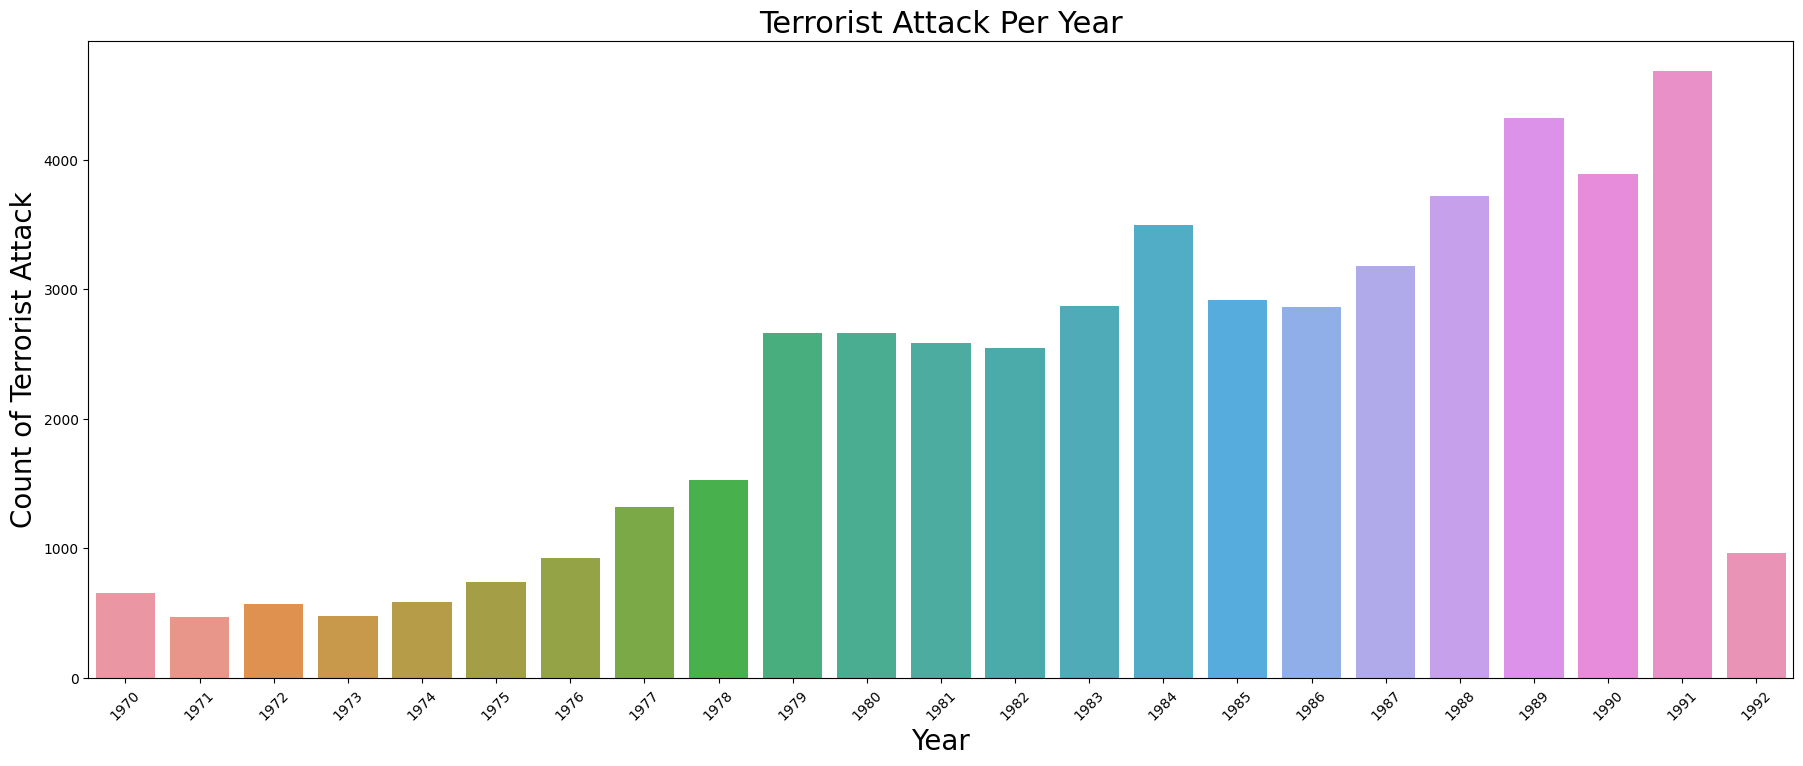

In [ ]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='iyear',data=df_1)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Terrorist Attack Per Year',fontsize=22);

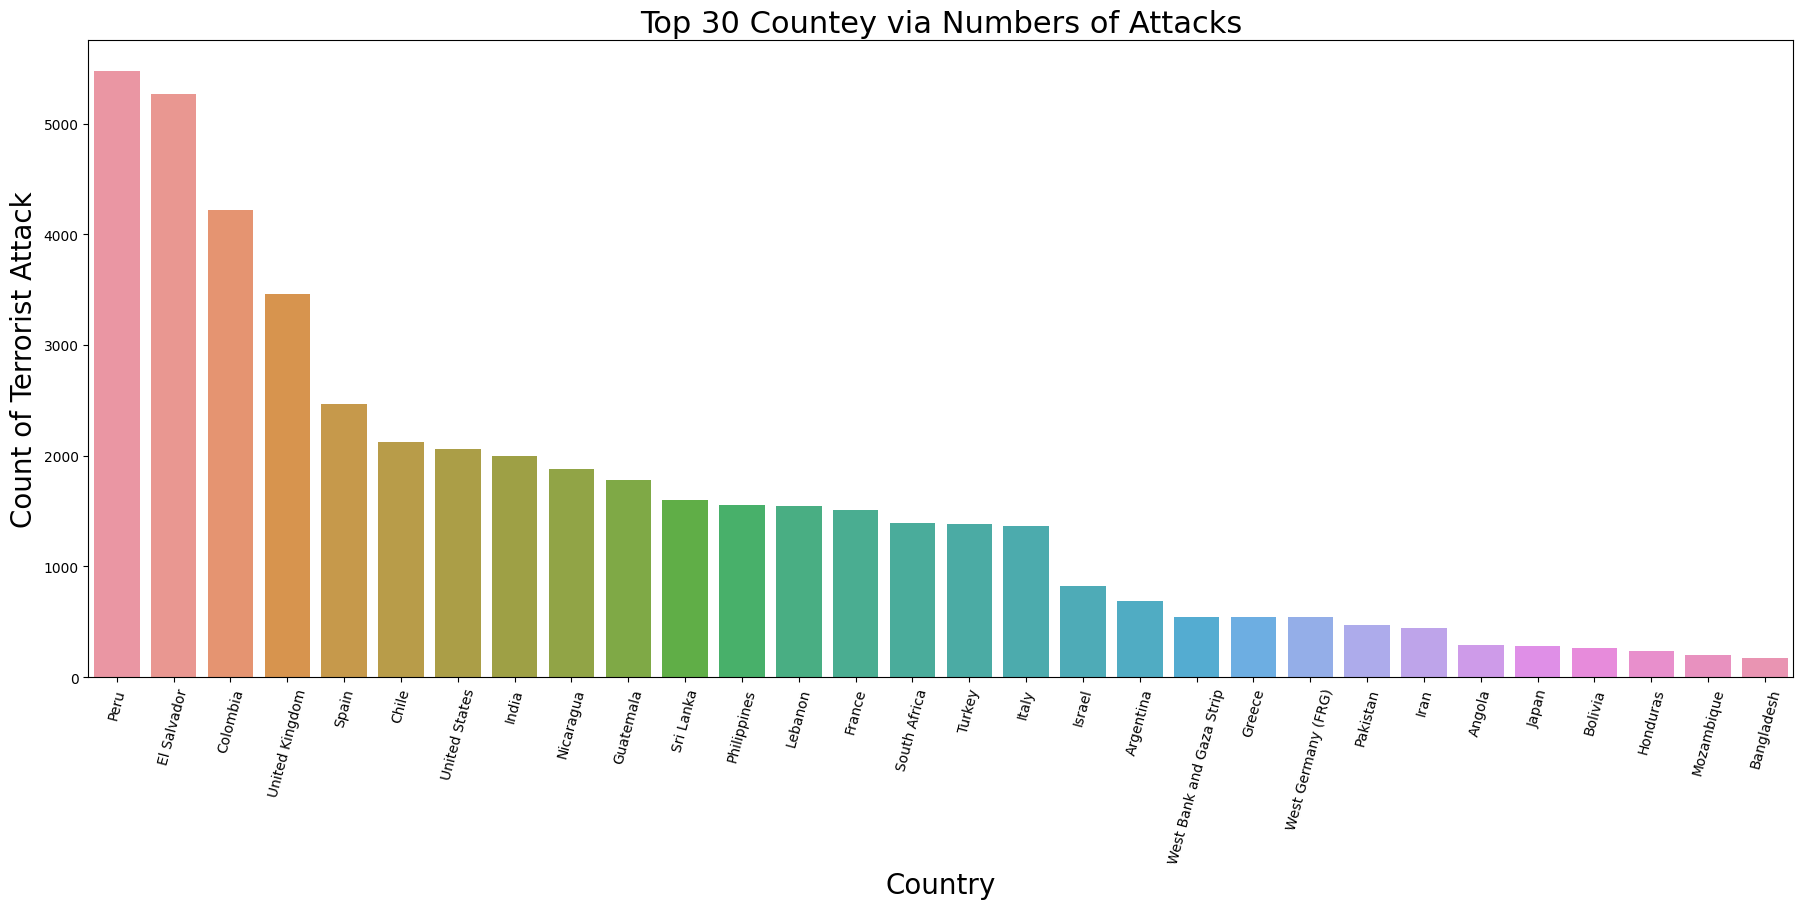

In [ ]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='country_txt',data=df_1,order = df_1['country_txt'].value_counts().index[:30])
ax.set_xlabel('Country',fontsize=20)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Top 30 Countey via Numbers of Attacks',fontsize=22);

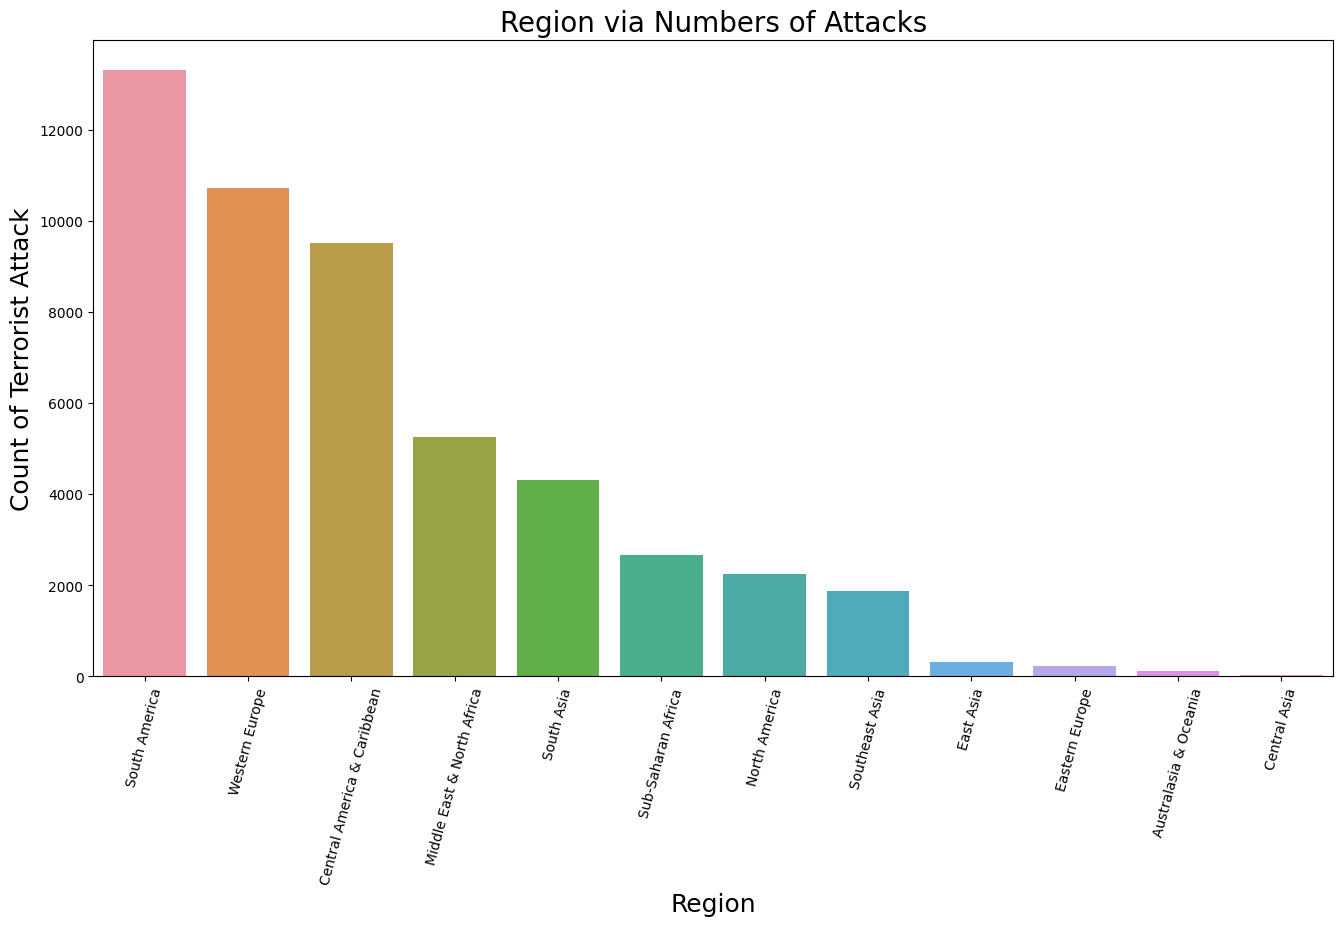

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='region_txt',data=df_1,order = df_1['region_txt'].value_counts().index)
ax.set_xlabel('Region',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=18)
ax.set_title('Region via Numbers of Attacks',fontsize=20);

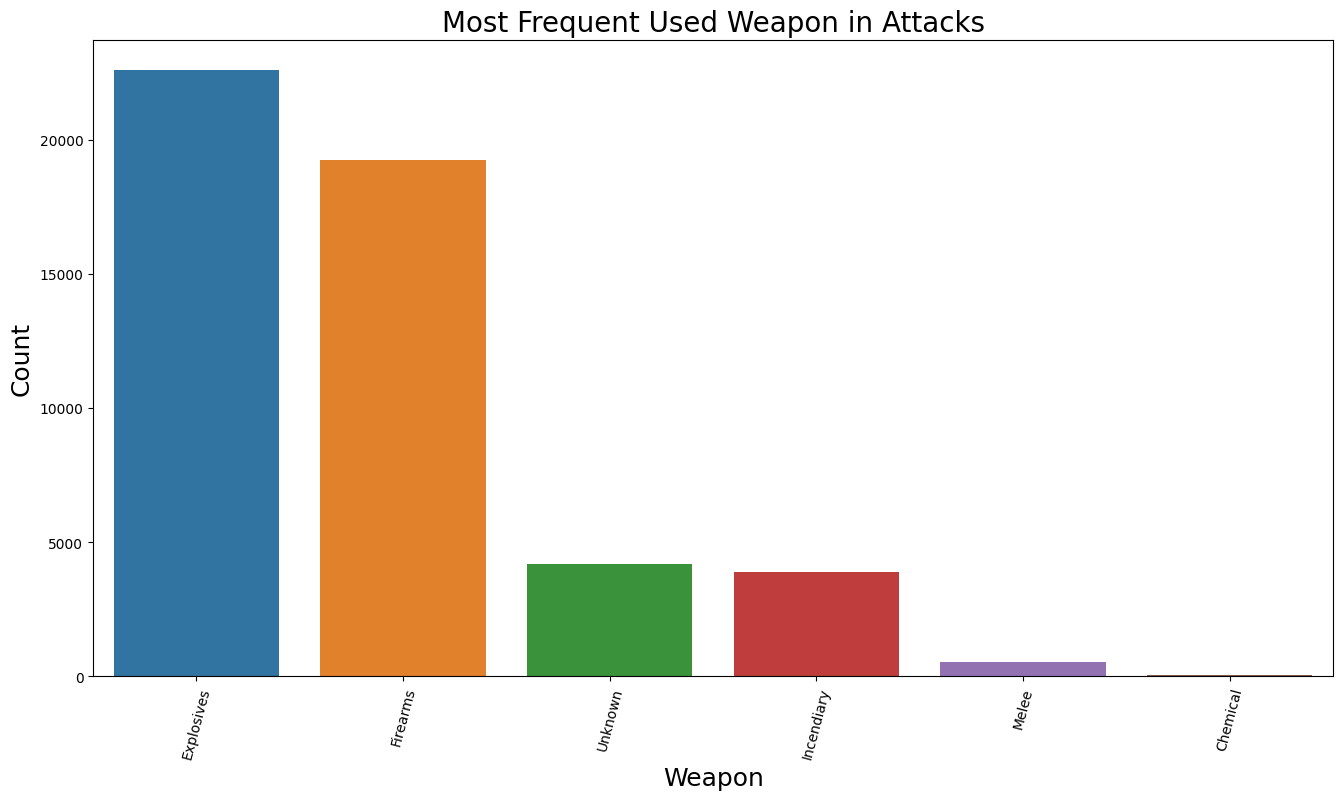

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='weaptype1_txt',data=df_1,order = df_1['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Used Weapon in Attacks',fontsize=20);

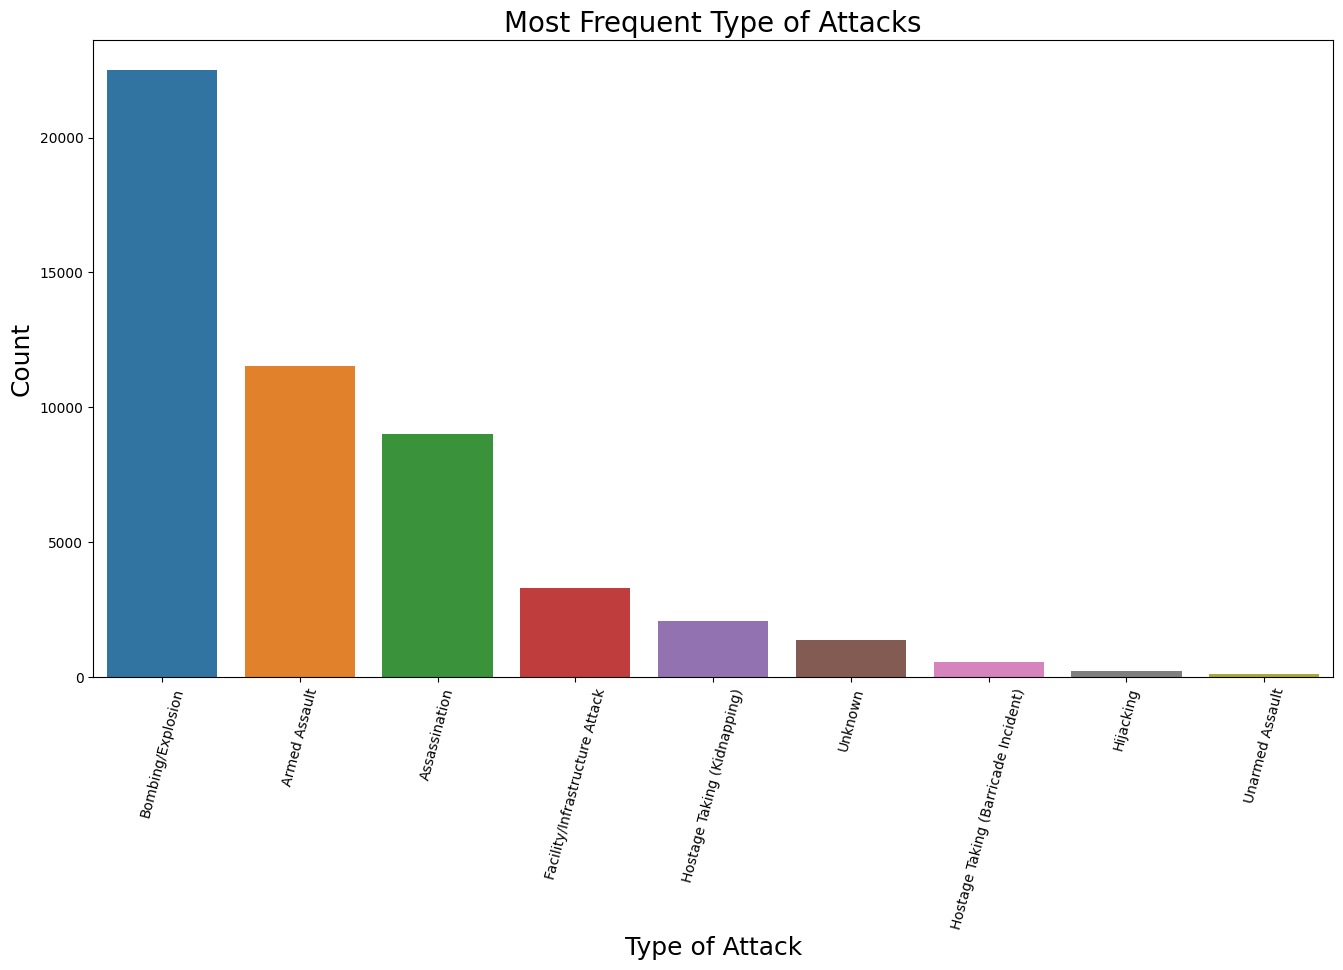

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='attacktype1_txt',data=df_1,order = df_1['attacktype1_txt'].value_counts().index)
ax.set_xlabel('Type of Attack',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Type of Attacks',fontsize=20);

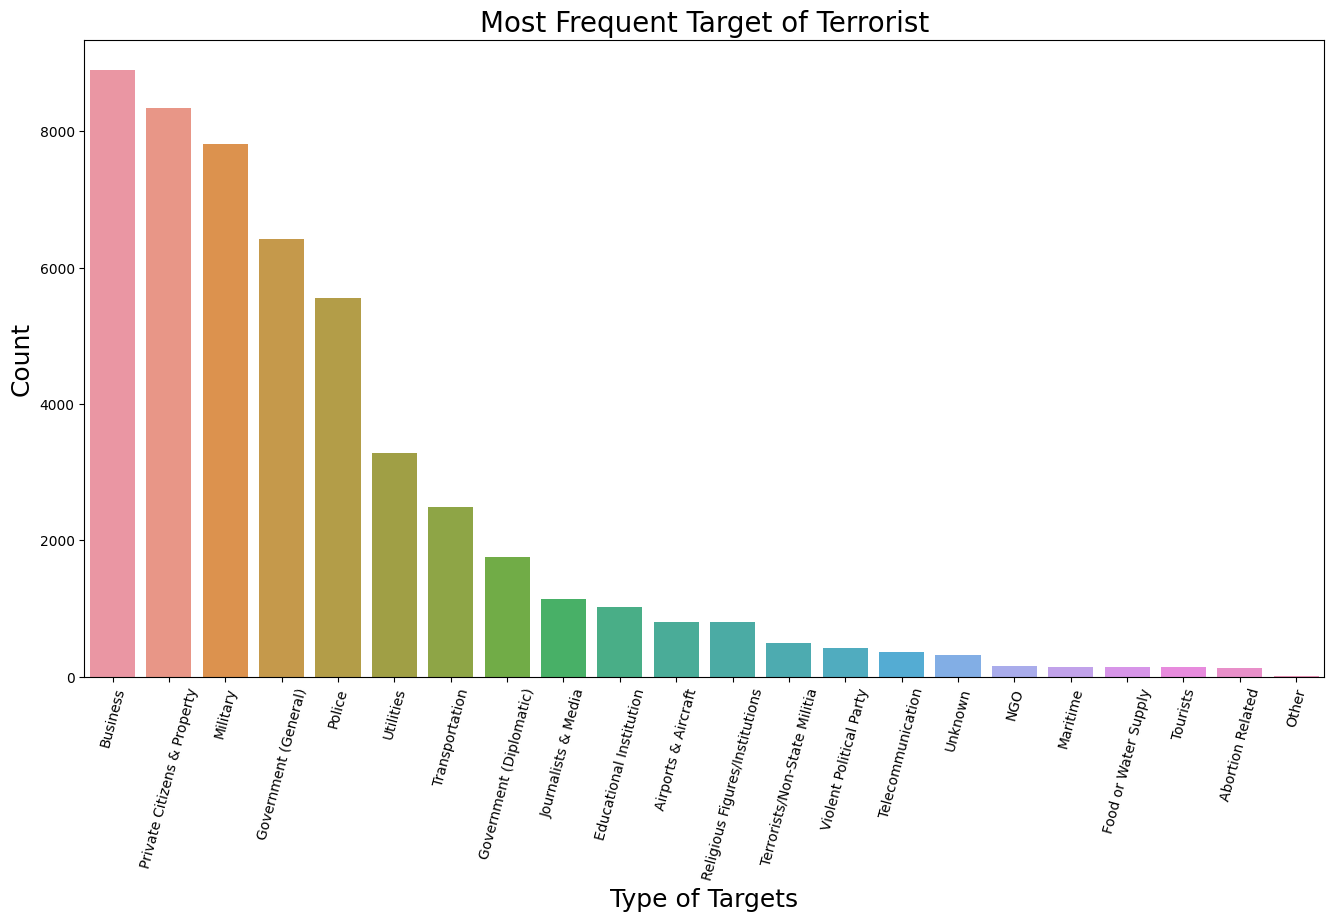

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='targtype1_txt',data=df_1,order = df_1['targtype1_txt'].value_counts().index)
ax.set_xlabel('Type of Targets',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Target of Terrorist',fontsize=20);

In [ ]:
df_1['gname'].value_counts()

Unknown                                             15229
Shining Path (SL)                                    4111
Farabundo Marti National Liberation Front (FMLN)     3348
Irish Republican Army (IRA)                          2342
Basque Fatherland and Freedom (ETA)                  1578
                                                    ...  
Kuna Indians                                            1
Jewish Defenders                                        1
Basque Country Autonomous Self-Defense Group            1
Kamal Udwan Unit of Palestinians                        1
Supporters of leftist Gana-Oikya Front                  1
Name: gname, Length: 1679, dtype: int64

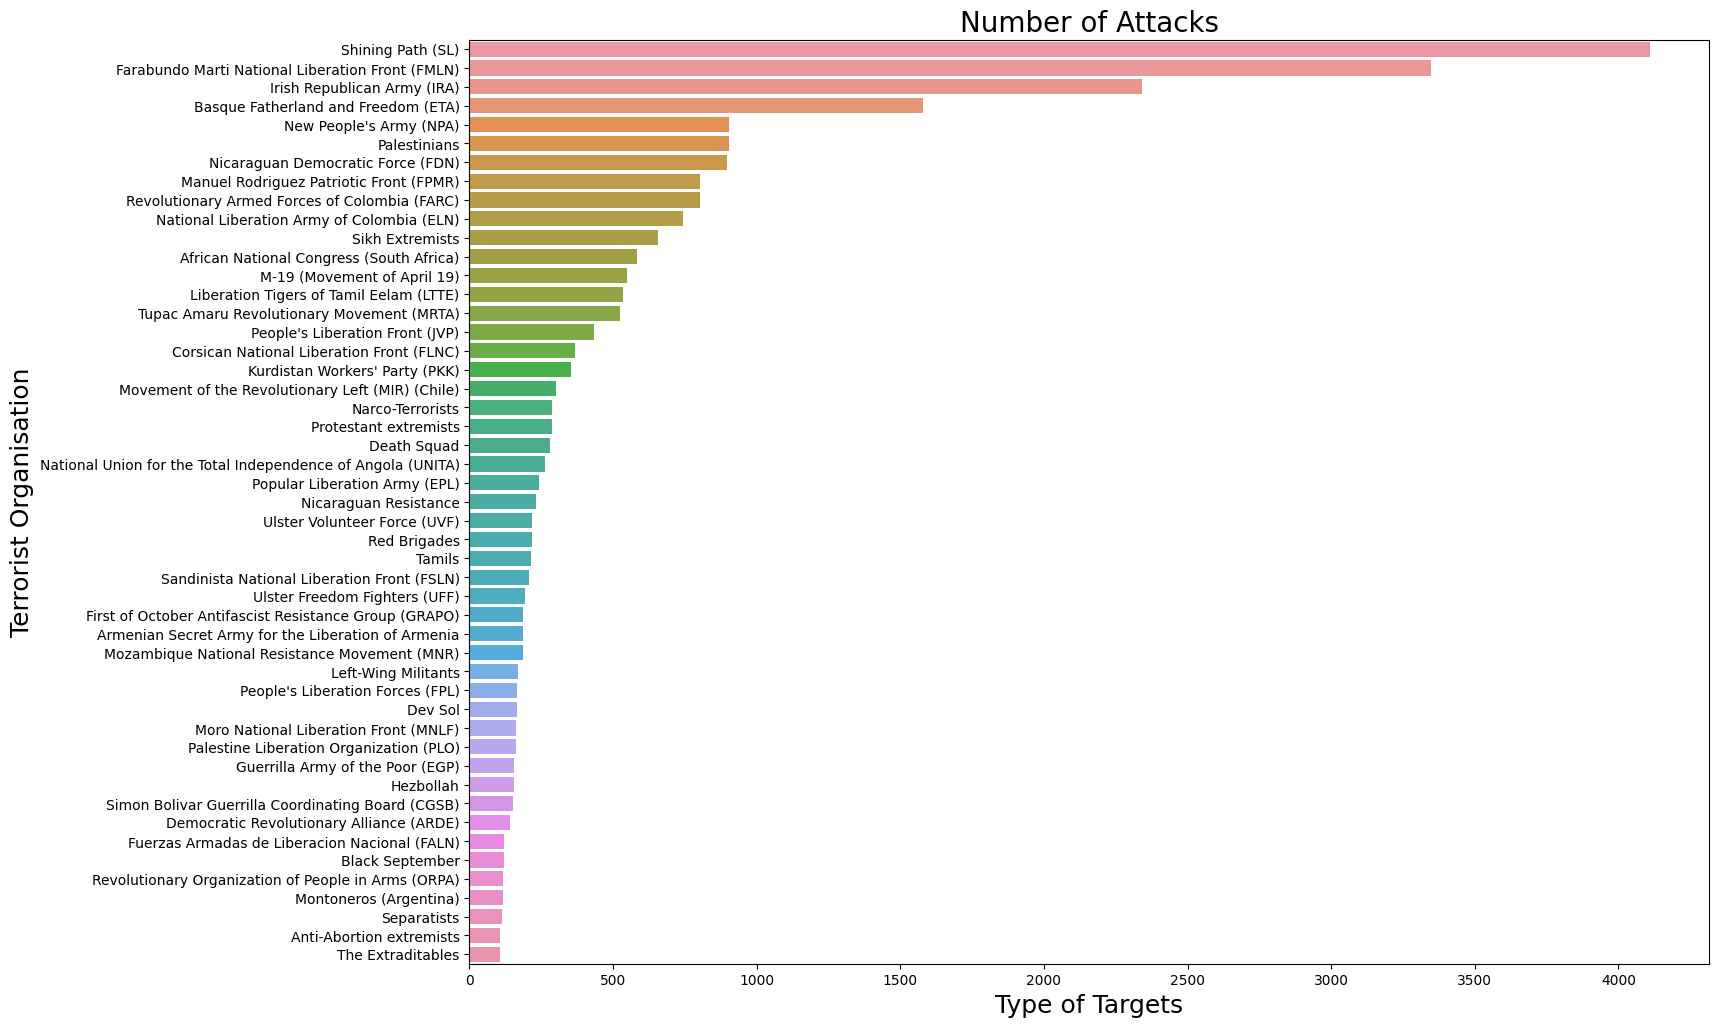

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,12
ax=sns.countplot(y='gname',data=df_1,order = df_1['gname'].value_counts().index[1:50])
ax.set_xlabel('Type of Targets',fontsize=18)
# plt.yticks(rotation = 75)
ax.set_ylabel('Terrorist Organisation',fontsize=18)
ax.set_title('Number of Attacks',fontsize=20);

In [ ]:
print('\n')
print(('*')*20)
print('Value count of Object Type Category which if greater than 50')
print('\n')
print(('*')*20)
cat_col=df_1.select_dtypes('object').columns.to_list()
for col in cat_col:
  if len(df_1[col].value_counts())<50:
    print(df_1[col].value_counts())
    print('\n')
    print(('*')*20)




********************
Value count of Object Type Category which if greater than 50


********************
South America                  13316
Western Europe                 10716
Central America & Caribbean     9512
Middle East & North Africa      5248
South Asia                      4315
Sub-Saharan Africa              2671
North America                   2240
Southeast Asia                  1883
East Asia                        326
Eastern Europe                   229
Australasia & Oceania            127
Central Asia                      26
Name: region_txt, dtype: int64


********************
Bombing/Explosion                      22498
Armed Assault                          11528
Assassination                           9005
Facility/Infrastructure Attack          3276
Hostage Taking (Kidnapping)             2084
Unknown                                 1373
Hostage Taking (Barricade Incident)      539
Hijacking                                211
Unarmed Assault                    

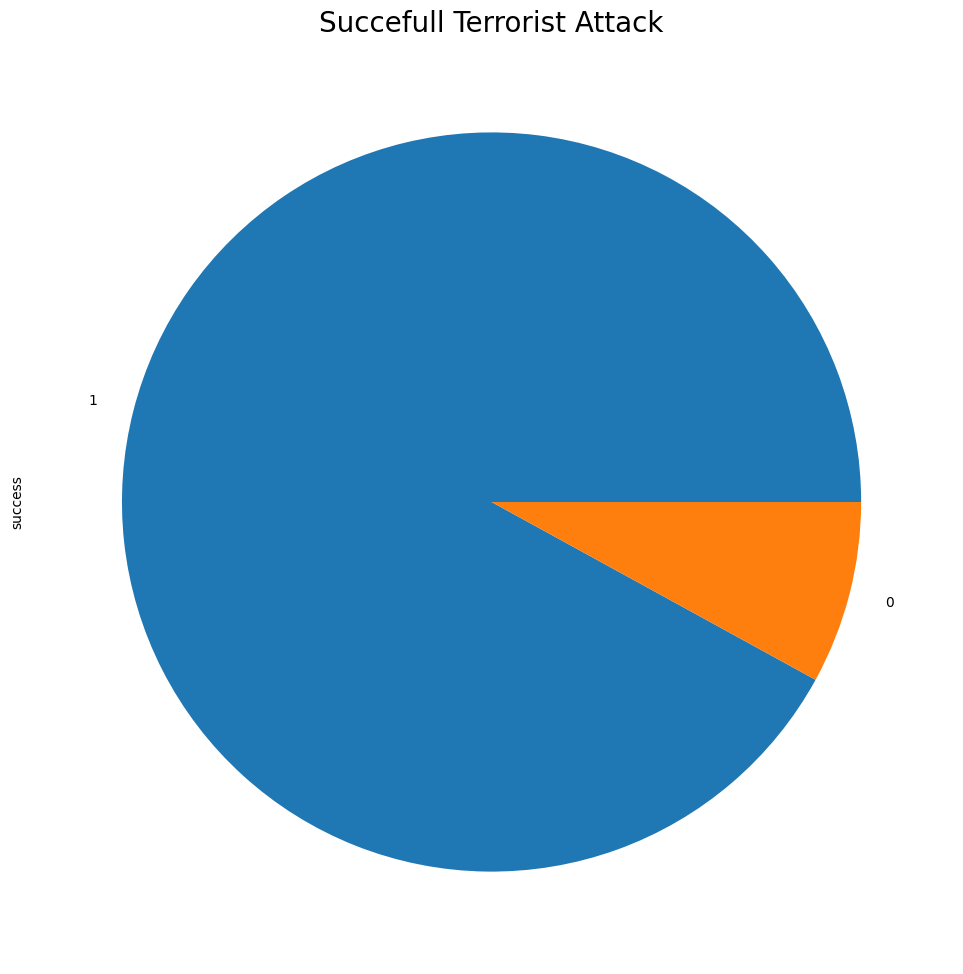

In [ ]:
ax=df_1['success'].value_counts().plot(kind='pie')
ax.set_title('Succefull Terrorist Attack',fontsize=20);

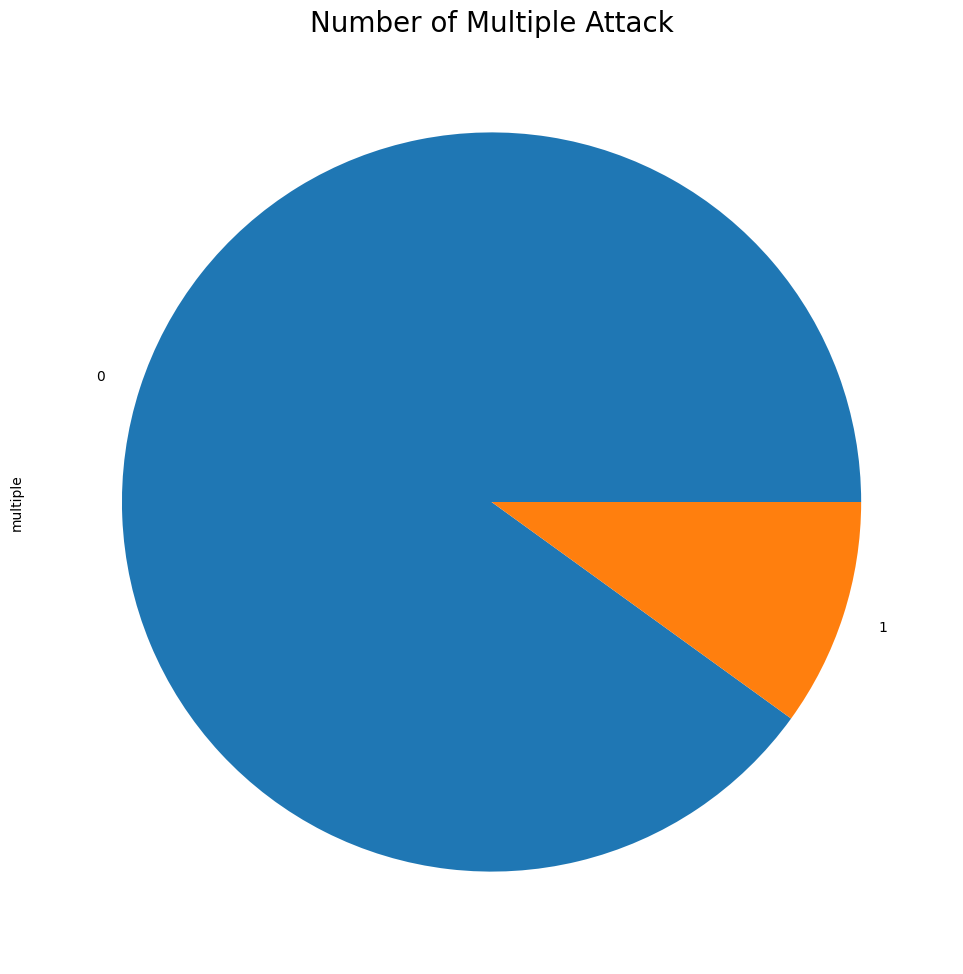

In [ ]:
ax=df_1['multiple'].value_counts().plot(kind='pie')
ax.set_title('Number of Multiple Attack',fontsize=20);

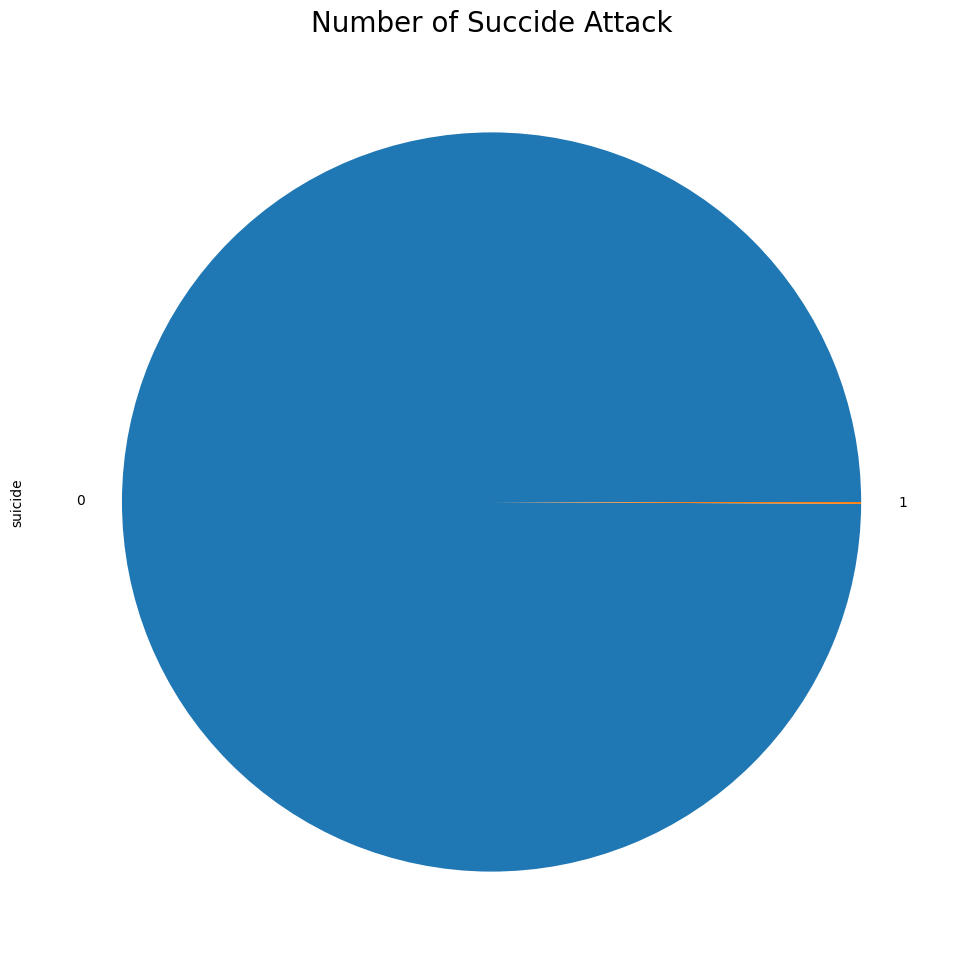

In [ ]:
ax=df_1['suicide'].value_counts().plot(kind='pie')
ax.set_title('Number of Succide Attack',fontsize=20);

In [ ]:
suceess_country=df_1.groupby('country_txt').agg({'eventid':'count','success':'sum'}).reset_index()
suceess_country.columns=['Country','Total_Attacks','Attack_Success']
suceess_country['Attack_Failed']=suceess_country['Total_Attacks']-suceess_country['Attack_Success']
suceess_country['Failure_Rate_Attack']=(suceess_country['Attack_Failed']/suceess_country['Total_Attacks'])*100
suceess_country['Success_Rate_Attack']=(suceess_country['Attack_Success']/suceess_country['Total_Attacks'])*100
suceess_country=suceess_country.round(2)

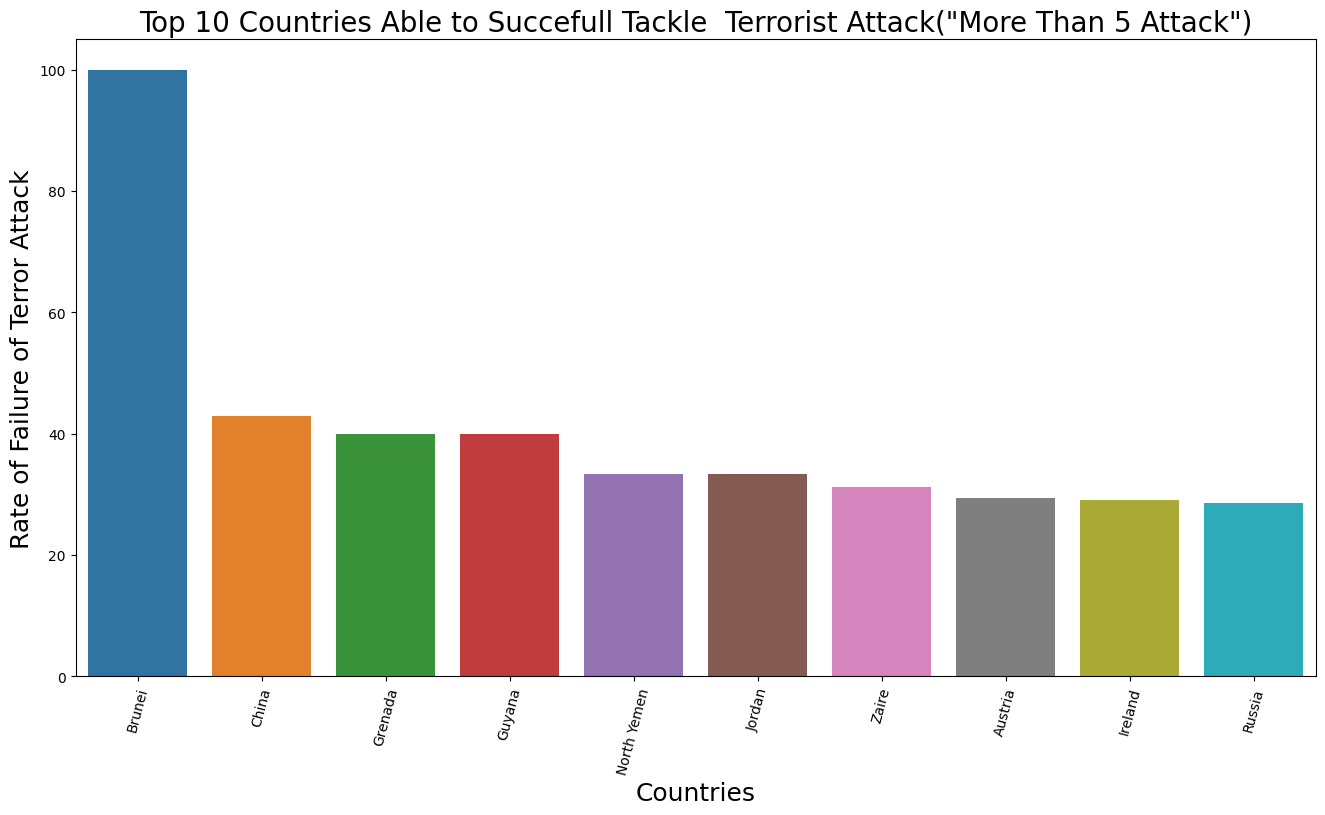

In [ ]:
able_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Failure_Rate_Attack',ascending=False )[:10]
plot_able_stop_terror_attack=able_stop_terror_attack.loc[:,['Country','Failure_Rate_Attack']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Failure_Rate_Attack',data=plot_able_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Failure of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries Able to Succefull Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

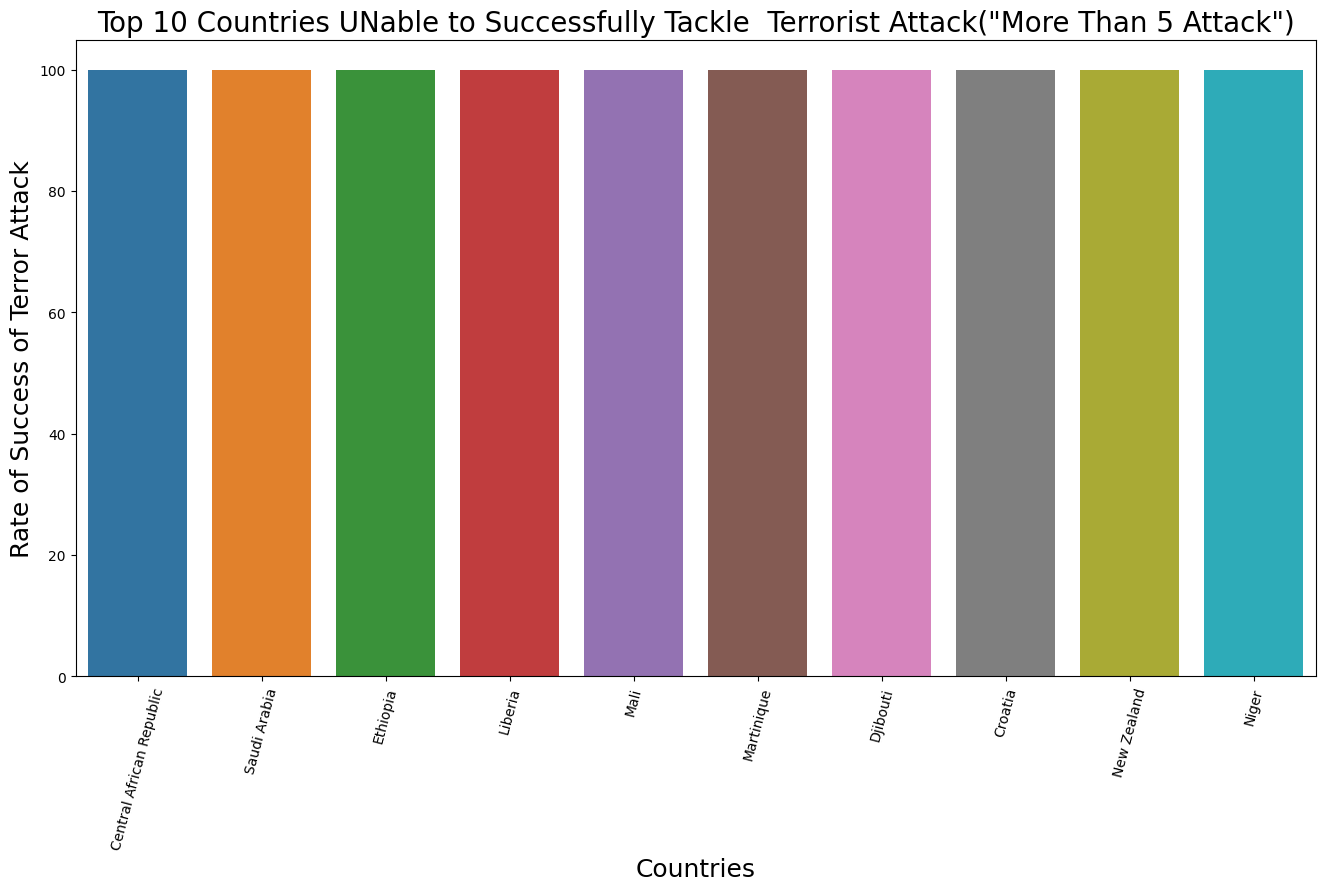

In [ ]:
unable_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Success_Rate_Attack',ascending=False )[:10]
plot_unable_stop_terror_attack=unable_stop_terror_attack.loc[:,['Country','Success_Rate_Attack','Total_Attacks']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Success_Rate_Attack',data=plot_unable_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Success of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries UNable to Successfully Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

In [ ]:
attack_per_year=df_1.groupby(['iyear','targtype1_txt','target1','success','weaptype1_txt','gname'])['eventid'].count().to_frame(name = 'Total_Attacks').reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

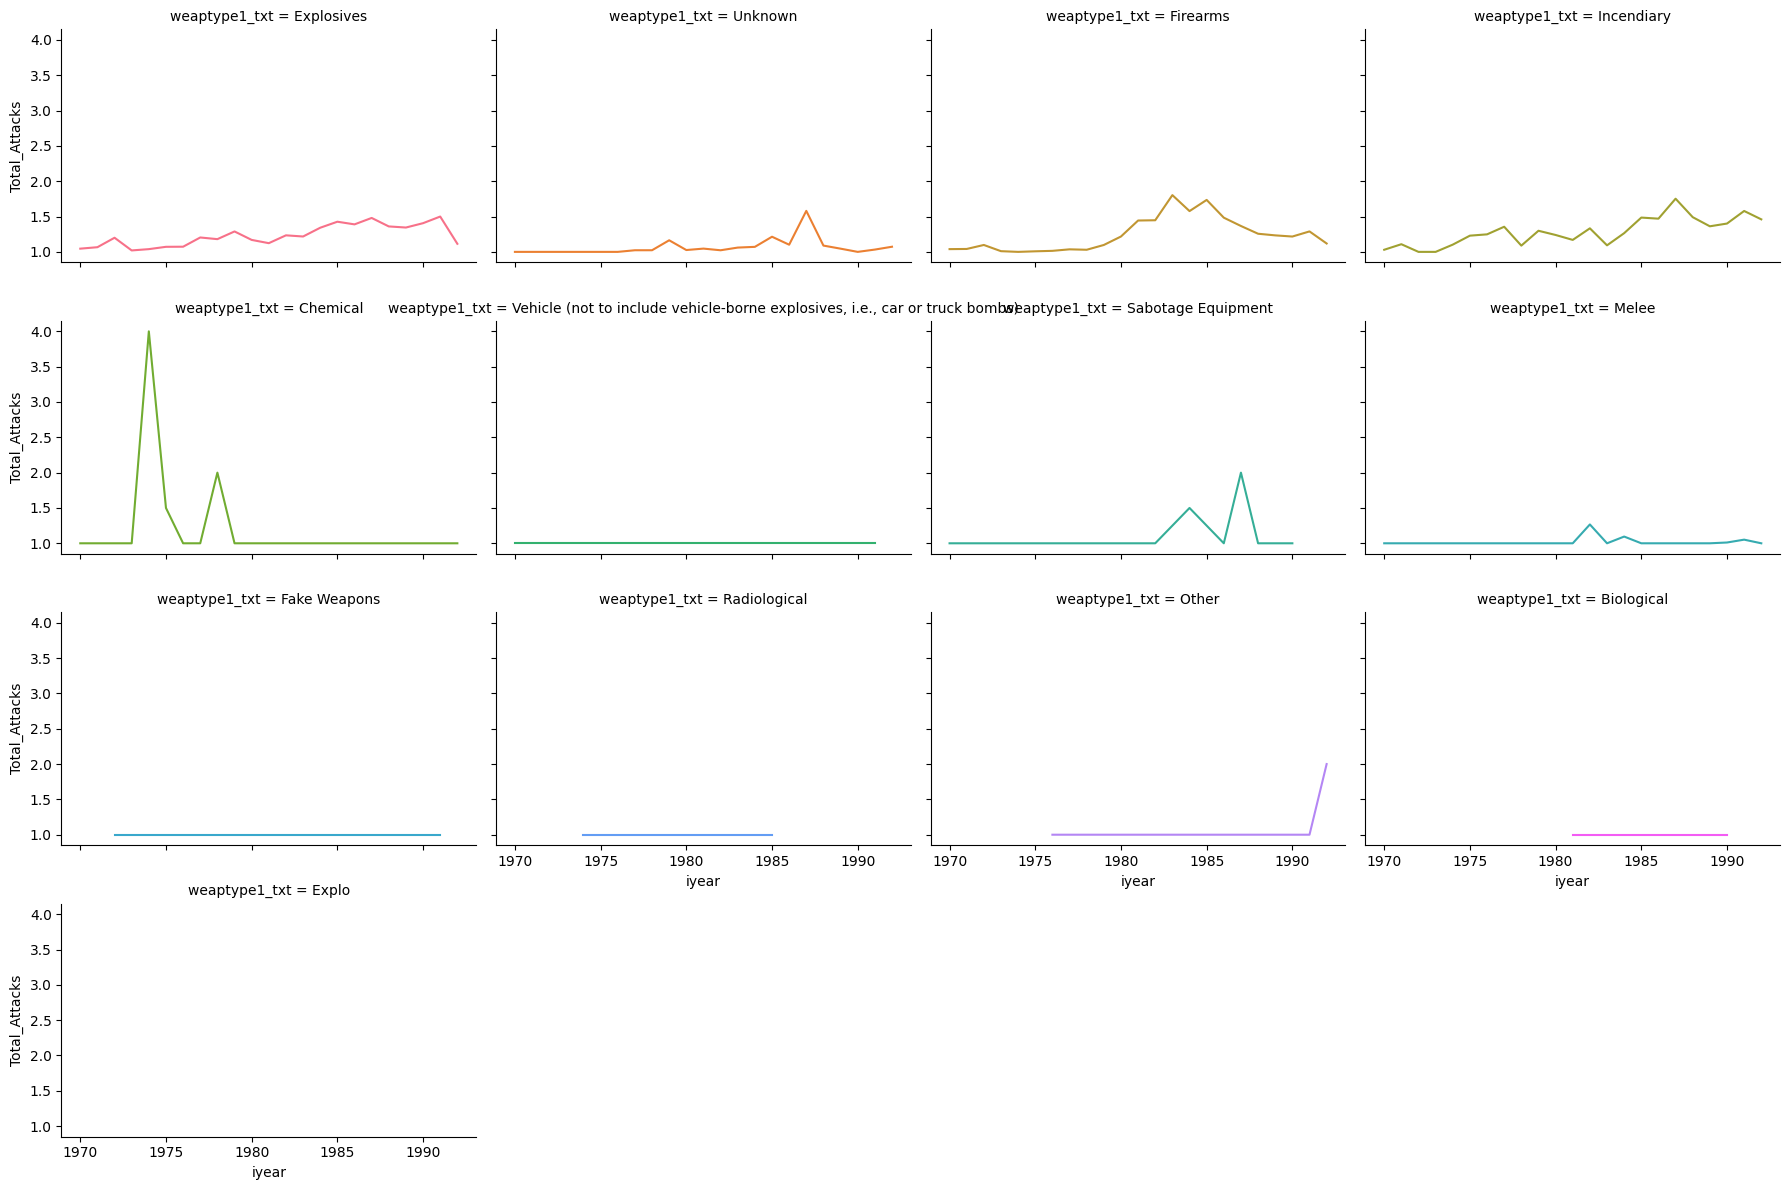

In [ ]:
ax = sns.relplot(col="weaptype1_txt", y="Total_Attacks",col_wrap=4, hue='weaptype1_txt',x="iyear",kind='line', ci=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

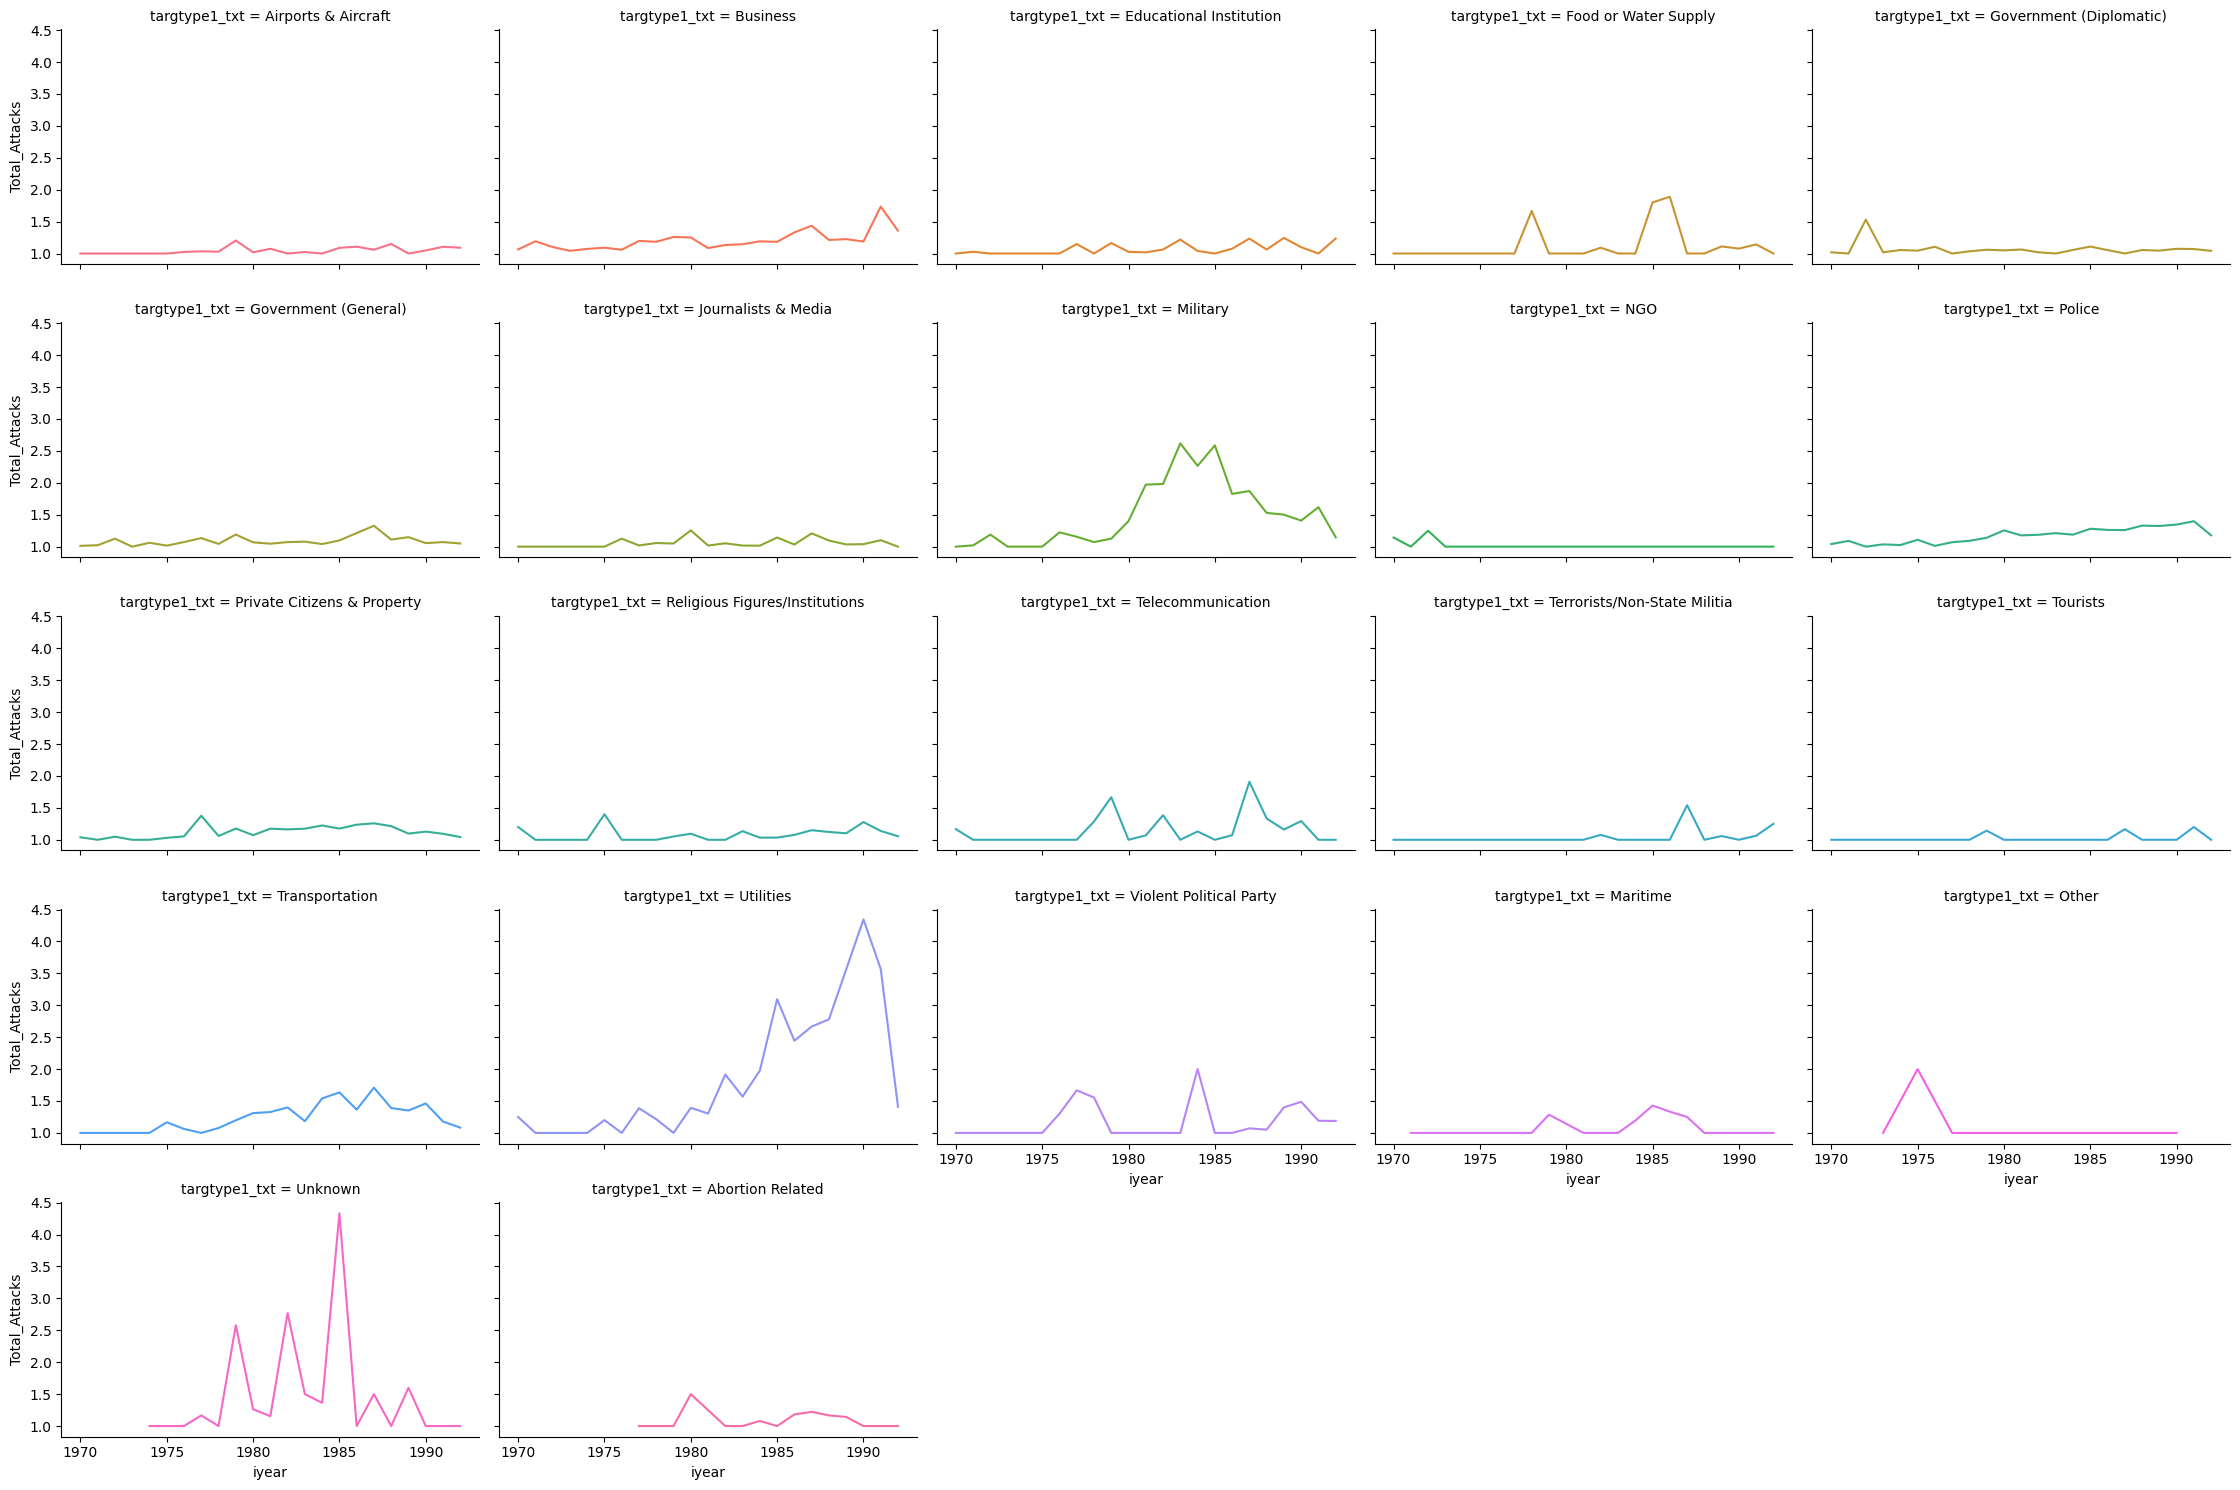

In [ ]:
ax = sns.relplot(col="targtype1_txt", y="Total_Attacks",col_wrap=5, hue='targtype1_txt',x="iyear",kind='line', ci=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)
# ax.tick_params(rotation=45)

<ipython-input-39-47d04da09b28>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="iyear", y="Total_Attacks", hue='success', ci=None ,data=attack_per_year)


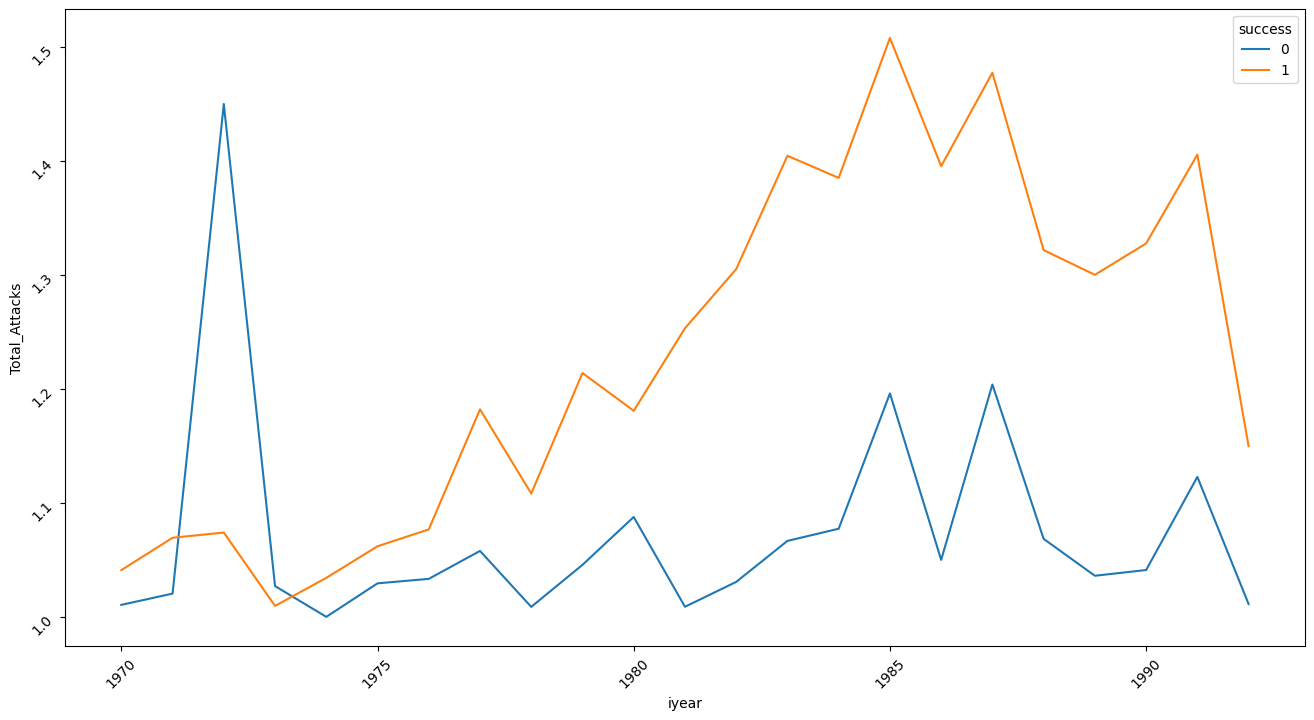

In [ ]:
ax = sns.lineplot(x="iyear", y="Total_Attacks", hue='success', ci=None ,data=attack_per_year)
ax.tick_params(rotation=45)

<ipython-input-40-82320090ccf2>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x="iyear", y="Total_Attacks", ci=None, data=attack_per_year)


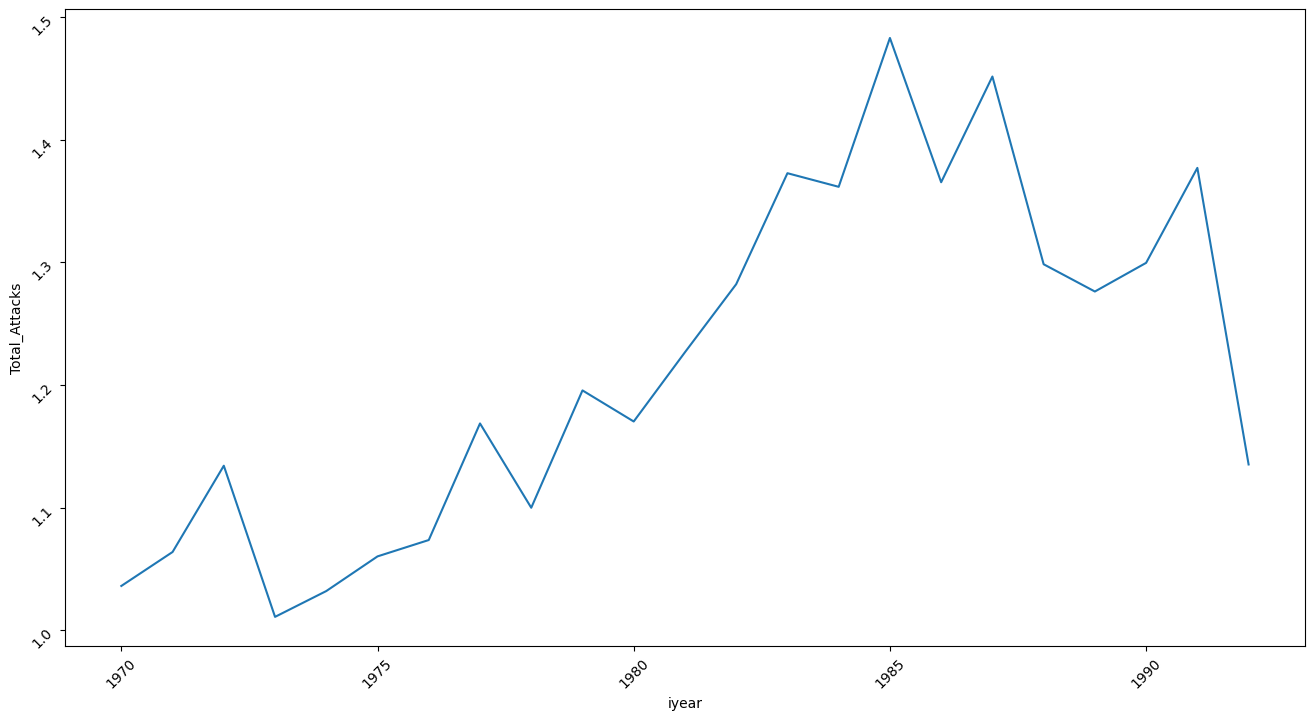

In [ ]:
ax = sns.lineplot(x="iyear", y="Total_Attacks", ci=None, data=attack_per_year)
ax.tick_params(rotation=45)